In [1]:
# Load the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data set
iris = pd.read_csv("iris.data", header = None)

In [3]:
# Overview of the data set
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Add column names

Problem! Need to add column names as they are not named in the imported data set.

The column names were obtained from the variables table on the [information page of the iris data set](https://archive.ics.uci.edu/dataset/53/iris) and they are sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm and species.

Problem loosing 1 row of data doing it this way. it is converting the data in row 0 to the column names direcly. need to add the column names above the row. Fixed the problem using the argument [header = None](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html) when reading in the csv file. 

In [4]:
iris.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'species']  
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Summary statistics of the data set
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.groupby('species').describe()

sepal_length_cm                                              \
                          count   mean       std  min    25%  50%  75%  max   
species                                                                       
Iris-setosa                50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor            50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica             50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width_cm         ... petal_length_cm       \
                         count   mean  ...             75%  max   
species                                ...                        
Iris-setosa               50.0  3.418  ...           1.575  1.9   
Iris-versicolor           50.0  2.770  ...           4.600  5.1   
Iris-virginica            50.0  2.974  ...           5.875  6.9   

                petal_width_cm                                            
                         count   mean       std  min  25%  50%  75%  max  
species                                                                   
Iris-setosa               50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor           50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica            50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [8]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
setosa = iris[iris['species'] == 'Iris-setosa']
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


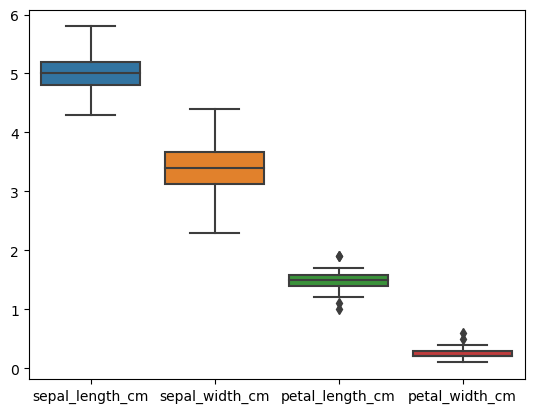

In [10]:
#Box plot of above, add titles

sns.boxplot(setosa)
plt.show()

In [11]:
versicolor = iris[iris['species'] == 'Iris-versicolor']
versicolor.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


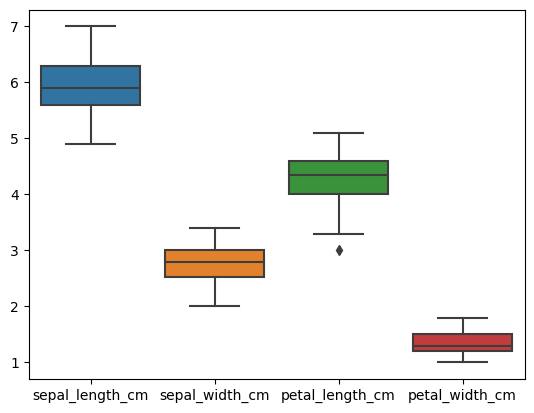

In [12]:
sns.boxplot(versicolor)
plt.show()

In [13]:
virginica = iris[iris['species'] == 'Iris-virginica']
virginica.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


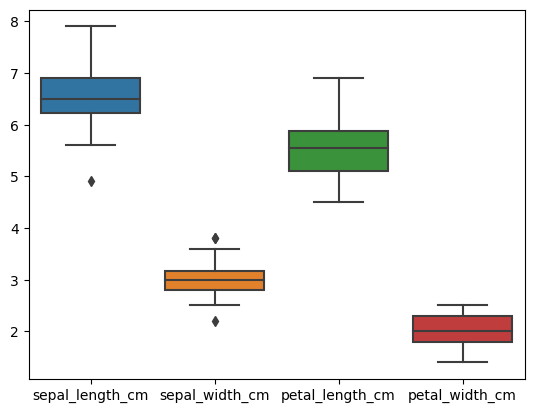

In [14]:
sns.boxplot(virginica)
plt.show()

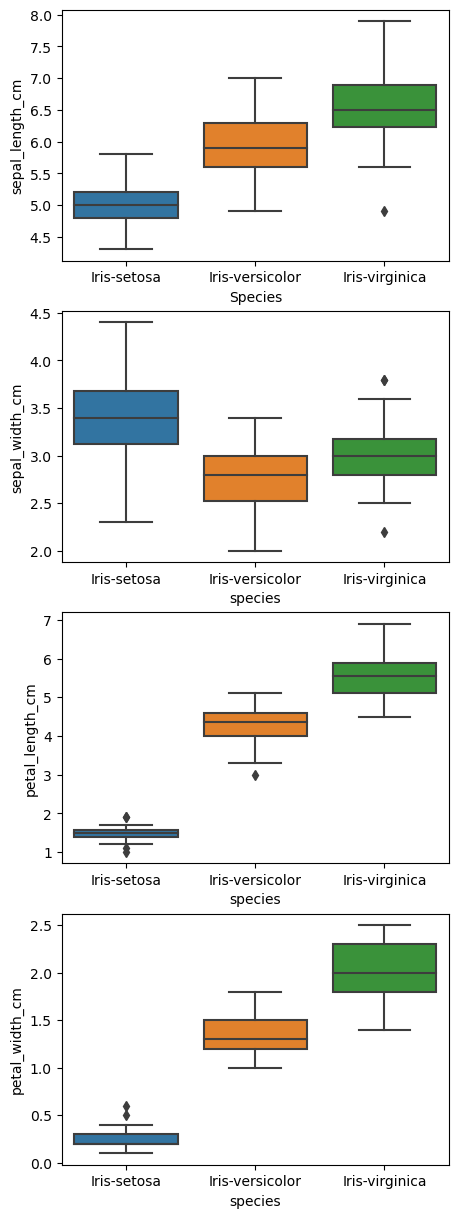

In [15]:
## Trying to compare across the three species. Looks squashed. 

fig, axes = plt.subplots(4, figsize = (5, 15))
sns.boxplot(ax = axes[0], x = 'species', y = 'sepal_length_cm', data = iris)
axes[0].set_xlabel('Species')
sns.boxplot(ax = axes[1], x = iris['species'], y= iris['sepal_width_cm'])
sns.boxplot(ax = axes[2], x = iris['species'], y = iris['petal_length_cm'])
sns.boxplot(ax = axes[3], x = iris['species'], y = iris['petal_width_cm'])

plt.show()

## Histogram of each variable

A histogram of each variable must be saved to a png file.

TO DO
overall hist
breakdown by species. 

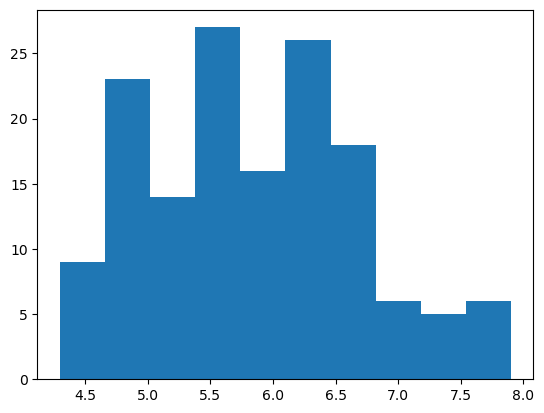

In [16]:
plt.hist(iris['sepal_length_cm'])
plt.title()
plt.show()

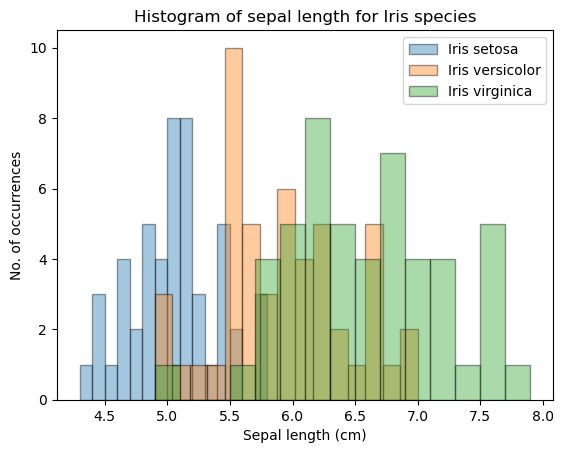

In [41]:
# Histogram of Sepal Length by species. 
fig, ax = plt.subplots()
ax.hist(setosa['sepal_length_cm'], label = 'Iris setosa', edgecolor = 'black', alpha = 0.4, bins = 15)
ax.hist(versicolor['sepal_length_cm'], label = 'Iris versicolor', edgecolor = 'black', alpha = 0.4, bins = 15)
ax.hist(virginica['sepal_length_cm'], label = 'Iris virginica', edgecolor = 'black', alpha = 0.4, bins = 15)
ax.set_title('Histogram of sepal length for Iris species')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('No. of occurrences')
ax.legend()
plt.savefig('sepal_length.png')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'title'

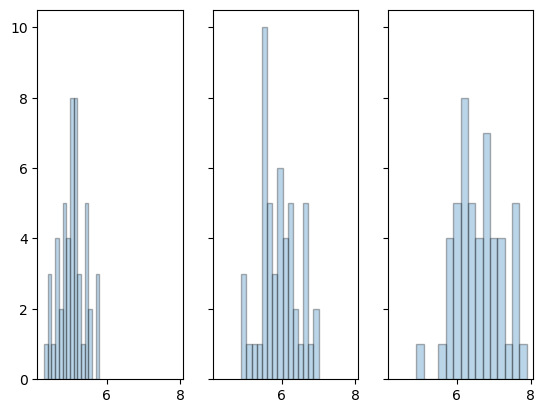

In [44]:
fig, ax = plt.subplots(1, 3, sharex= True, sharey= True)
ax[0].hist(setosa['sepal_length_cm'], label = 'Iris setosa', edgecolor = 'black', alpha = 0.3, bins = 15)
ax[1].hist(versicolor['sepal_length_cm'], label = 'Iris versicolor', edgecolor = 'black', alpha = 0.3, bins = 15)
ax[2].hist(virginica['sepal_length_cm'], label = 'Iris virginica', edgecolor = 'black', alpha = 0.3, bins = 15)
ax.set_title('Histogram of sepal length for Iris species')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('No of occurrances')
ax.legend()
plt.savefig('sepal_length.png')
plt.show()

## References

https://www.geeksforgeeks.org/ways-to-save-python-terminal-output-to-a-text-file/

[Iris Data Set](https://archive.ics.uci.edu/dataset/53/iris)
